In [1]:
# 2024-Feb-15: Página do dataset do NIST:
# https://itl.nist.gov/div898/strd/nls/data/gauss2.shtml
# Deste local, baixei Gauss2.dat e incluí no projeto

[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 250
    # variables        = 8
    chi-square         = 1247.52821
    reduced chi-square = 5.15507524
    Akaike info crit   = 417.864631
    Bayesian info crit = 446.036318
    R-squared          = 0.99648654
[[Variables]]
    exp_amplitude:  99.0183278 +/- 0.53748593 (0.54%) (init = 162.2102)
    exp_decay:      90.9508853 +/- 1.10310778 (1.21%) (init = 93.24905)
    g1_amplitude:   4257.77360 +/- 42.3836478 (1.00%) (init = 2000)
    g1_center:      107.030956 +/- 0.15006851 (0.14%) (init = 105)
    g1_sigma:       16.6725772 +/- 0.16048381 (0.96%) (init = 15)
    g1_fwhm:        39.2609181 +/- 0.37791049 (0.96%) == '2.3548200*g1_sigma'
    g1_height:      101.880230 +/- 0.59217173 (0.58%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
    g2_amplitude:   2493.417

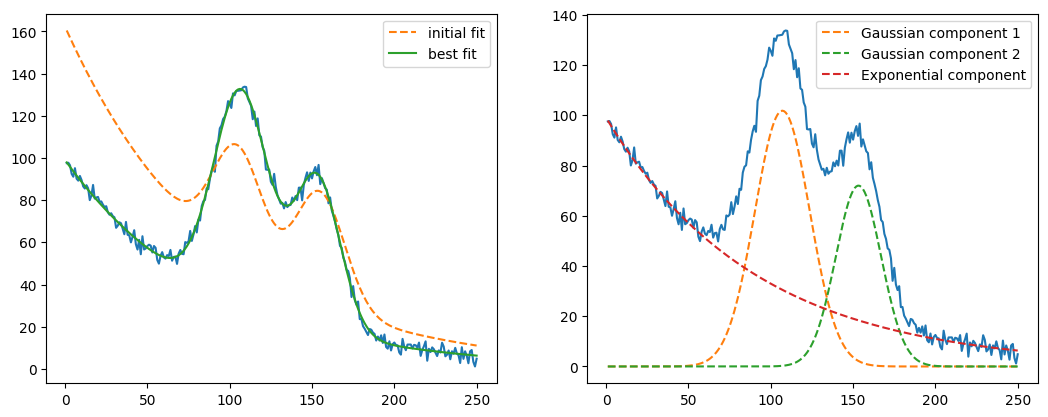

In [4]:
# <examples/doc_builtinmodels_nistgauss.py>
import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import ExponentialModel, GaussianModel
# from lmfit import Model, Minimizer, minimize, Parameters, report_fit, fit_report, printfuncs

dat = np.loadtxt('Gauss2_only_num_data.dat')
x = dat[:, 1]
y = dat[:, 0]

exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params(center=dict(value=105, min=75, max=125),
                               sigma=dict(value=15, min=0),
                               amplitude=dict(value=2000, min=0)))

gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params(center=dict(value=155, min=125, max=175),
                               sigma=dict(value=15, min=0),
                               amplitude=dict(value=2000, min=0)))

mod = gauss1 + gauss2 + exp_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(correl_mode='table'))

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y)
axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y)
axes[1].plot(x, comps['g1_'], '--', label='Gaussian component 1')
axes[1].plot(x, comps['g2_'], '--', label='Gaussian component 2')
axes[1].plot(x, comps['exp_'], '--', label='Exponential component')
axes[1].legend()

plt.show()
# <end examples/doc_builtinmodels_nistgauss.py>